<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Lesson_01_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO5853: Biostatistics**

## **Lesson_01_4: Charts**

##### **Module I: Variability**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)

### Module 1 Material
* Part 1.1: Getting Started with Google COLAB
* Part 1.2: Python Basics 1 -- Syntax, Operators, Expressions
* Part 1.3: Python Basics 2 -- Functions, Variables, Strings
* **Part 1.4: Python Basics 3 -- Charts**
* Part 1.5: Python Basics 4 -- Numerical Summary Measures

#### In this assignment you will learn about:

* Bar Charts
* Histograms
* Box Plots
* Scatter Plots
* Line Graphs

### Google CoLab Instructions

The following code will map your GDrive to ```/content/drive``` and print out your Google GMAIL address.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

## **Graphs**

Visualizing biostatistical data in graphical format is crucial for several reasons:

* **Revealing Hidden Patterns:** Graphics reveal features that statistics and models may miss, such as unusual data distributions, local patterns, clusters, gaps, outliers, and more1. These visual cues can stimulate research and suggest new ideas.
* **Data Exploration:** Graphs help us explore data structure, detect outliers, identify trends, and spot local patterns. They provide an intuitive way to become familiar with the data before diving into detailed analysis1.
* **Data Cleaning:** Visualizations help identify data quality issues, such as missing values or evidence of rounding. By examining graphs, we can clean and preprocess the data effectively.
* **Presenting Results:** Graphical displays make it easier for others to understand and interpret findings. A well-designed plot can convey complex information succinctly.

The primary objective of this lesson is to show you the Python code that can be used to generate the various graphs and plots that are presented in section **2.3 Graphs** in your textbook starting on page 24.

### Data Input

Before we can generate a graph we need to get access to the dataset that is shown in the graph. Today, datasets are mostly stored on the Internet in computer known as a **fileserver**. The file server for this course has the following URL

<https://biologicslab.co>

 In addition, there a number of private and government websites we you can download biological and medical data sets. Here are 3 examples:

1. **Kaggle:** Kaggle offers open datasets on various topics, including biology. You can explore and download datasets related to computer vision, natural language processing (NLP), and more
2. **data.world:** This platform hosts 65 biology datasets contributed by users and organizations worldwide.
3. **DagsHub:** DagsHub provides free open biology datasets for developing and training machine learning models.

### Pandas

One of the most common ways to download data from the internet using Python uses a software package called Pandas.

**_Pandas_** (pronounced as "PAN-daz") is a Python package designed for data manipulation and analysis. It provides data structures and operations for manipulating numerical tables and time series.

Pandas is built on top of the Numpy package and provides a high-level interface for working with data including data selection, cleaning, filtering, aggregation, and visualization.

A central concept in Pandas is the **_DataFrame_**. A Pandas DataFrame is generally the most commonly used Pandas object.

A _DataFrame_ is a two-dimensional labeled data structure with columns of potentially different data types (e.g. integers, floats, and strings). They are very similar to an Excel spreadsheet in which each **_row_** represents a single experimental subject or clinical patient and each **_column_** contains a different experimental or clinical measurement from the subject.


### The Pandas Package

Like other Python packages, Pandas has to be _imported_ into a Python program with the following command before it can be used.

`import pandas as pd`

The normal _alias_ ('nickname') for Pandas is `pd`. When using a method that is part of a Pandas package, the alias `pd` will be used instead of the package name. For example, to use the Pandas `read_csv()` method, the command would be:

`pd.read_csv(filename)`

where `pd` standards for `pandas`.

## **Bar Charts**

As your textbook points out, graphs are an important way to summarize data. Following your textbook, we begin with a very common type of graph, the **_bar chart_**.

A bar chart, also known as a bar graph, is a visual representation of data using rectangular bars. Here’s why it’s important:

1. **Easy to Understand:** Bar charts are widely used because they are simple to interpret. Most audiences grasp the information they convey without difficulty.
2. **Comparison and Trends:** They allow us to compare different categories or groups by representing values as bars. Additionally, bar charts can show changes over time, making them useful for visualizing trends.
3. **Storytelling Medium:** Beyond mere numbers, bar charts become a medium for storytelling and simplifying complex information. They cater to both experts and novices3.

### Example 1: Download Dataset

The creation of charts and graphs requires data. Increasingly, datasets, especially large ones, are stored on the internet on **_file servers_**. For this course we have a dedicated file server at the following URL:

<https://biologicslab.co>

The data used to generate FIGURE 2.1 can be found in a file called `australia_diseases.csv`. The file extension, `.csv` stands for `comma separated variables` which means each piece of data in this file is separated from each other by a comma.

The Python code in the cell below uses the Pandas function `pd.read_csv()` to read the dataset `australia_diseases.csv` from the course file server. As the file is read, a Pandas DataFrame called `adDF` is created.

There is nothing "magical" about the name `adDF` and we could have called it `Austrailian_Diseases_Data` or simply `df`. As part of the _Zen of Python Programming_ shorter variable names are preferred to longer ones. In this course, I typically name a new DataFrame with a short pre-fix like `ad` followed by `DF` to remind you (and me) that this is a DataFrame containing a specific dataset. (The `ad` standard for `austrailian diseases).

Whenever you create a new DataFrame, it's **always** a good idea to display some of the DataFrame's contents to make sure everything went according to plan. The code at the botton of cell sets the maximum rows and columns to display to `6` and then displays the contents of `adDF`.

_Code Desciption:_

Since we need to use the _Pandas_ library, we begin by "importing" Pandas and giving it the "nickname" (alias) `pd`.

~~~text
import pandas as pd
~~~
Wherever you see the letters `pd`, it really means `Pandas`.

The specific Pandas function that reads the datafile is `pd.read_csv()` as shown in this code chunk:

~~~text
# Read the datafile
adDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/australia_diseases.csv",
    index_col=0,
    na_values=['NA','?'])
~~~

For some datafiles, it is necessary to pass the argument `index_col=0` to read the datafile correctly; for other datafiles setting the index column to 0 will cause the datafile to be read incorrectly.

Notice that the code chunk begins with `adDF=`. The is the name of the Pandas DataFrame that will store the file's information.

Since it is quite possible to read a datafile _incorrectly_ for a variety of reasons, it is **always** a good idea to print out a few records in a newly created DataFrame to see if the read was sucessful. Since data files can have very large numbers of rows and columns--too many to print to your computer screen--it is useful to specify the maximum number of rows and columns that you want to see. This is done in the following code chunk where both values are set to `6`:

~~~text
# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 6)
~~~

The last step is to use the `display()` function to take a peek at our new DataFrame:

~~~text
# Display DataFrame
display(adDF)
~~~~

In [1]:
# Example 1: Download dataset

import pandas as pd

# Read the datafile
adDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/australia_diseases.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 6)

# Display DataFrame
display(adDF)

,disease,percent
1,Mental and Behavioral Conditions,19.600000
2,Arthritis,19.799999
3,Hypertension,14.600000
...,...,...
8,Osteoporosis,4.500000
9,Cancer,2.100000
10,Kidney Disease,1.100000


If the code is correct, you should see the following table:

![___](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image1.png)


Notice that while we set the maximum columns to 6, only 2 columns were displayed since this dataset only has 2 columns.

### **Exercise 1: Download Dataset**

For **Exercise 1** you are to read the datafile called `maternal_mortality_countries.csv` located on the course HTTP server: `https://biologicslab.co/BIO5853/data/`. As you read the data, create a new DataFrame called `mmDF` to hold this information. As was done in Example 1, you will need to set the `index_col=0`.

Set the maximum rows to 6 and the maximum columns to 3 before you print an example your new DataFrame `mmDF` to the screen using the `display()` function.

In [ ]:
# Insert your code for Exercise 1 here



If your code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image3.png)


### Example 2: Create Bar Chart

Now that the austrailian disease data is stored in our DataFrame, `adDF`, we can create the bar chart shown in **FIGURE 2.1** on page 25 of your textbook.


_Code Description:_

The purpose of the first line of code, `import matplotlib.pyplot as plt` to load one part of the Python library `Matplotlib` into your computer's memory. The particular part of the Matplotlib library that we need to "import" is called `pyplot`. To make is easier to access the different functions and methods in this library, we give it an alias or "nickname", `plt`. We will use the alias `plt` when want to use a function or method in this library.

-------------------------------------------

### **Matplotlib**

**_Matplotlib_** is a powerful plotting library in Python that serves as a visualization utility. It's primary purpose is to provide users with tools and functionality to represent data graphically. It makes data analysis and understanding easier by creating static, animated, and interactive visualizations.

-----------------------------------

This next code snippet sorts the values in the DataFrame so the largest one (`Arithitis`) will be at the top of the graph:

~~~text
# Sort data
adDF.sort_values(by=['percent', 'disease'], ascending=True, inplace=True)
~~~

While sorting your data isn't strictly required, it easier to interpret the bar chart if the values are sorted.

To make our graph look like FIGURE 2.1, we need to rename the category (i.e. column) called `Mental and Behavioral Conditions` to be simply `MBC`. The code for renaming a column in a Pandas Dataframe is shown in the next code snippet:

~~~text
adDF['disease'] = adDF['disease'].cat.rename_categories({'Mental and Behavioral Conditions': 'MBC'})
~~~

Now we are ready to go ahead and assign values to `x` and `y` using this code snippet:

~~~text
# Assign x and y
x=adDF['percent']
y=adDF['disease']
~~~

This notation means that our `x` values will be the values (numbers) in the DataFrame column called `percent` while the `y` values will be the values in the DataFrame column called `disease`.

Like a lot of programming, the lines of code that generate the actual bar plot is fairly short:

~~~text
# Plot the bar chart
plt.barh(y, x, align='edge', color='#294171')
~~~~

The `h` at the end of `plt.barh()` means to generate a **_horizontal_** bar chart. As you will see below, the command `plt.bar()` will generate a vertical bar chart.

The reason that the color value `#294171` looks a little odd, is that we are trying to closely match the color of the bar chart as it appears on a Kindle app. If you just wanted to make the color blue, you could have simply used `color='b'` or `color='r'` for red, or `color='k'` for black.

The rest of the code simply adds the appropiate labels.

~~~text
# Add labels
plt.ylabel("")
plt.xlabel("Austrailian adults 18 years and older (%)")
plt.title("Bar Chart (FIGURE 2.1)")
~~~~


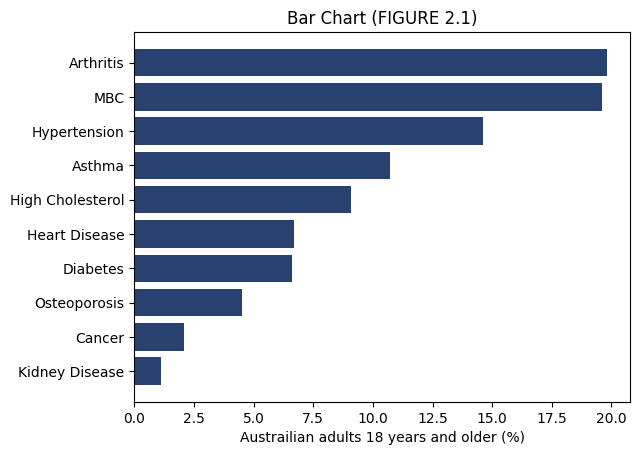

In [2]:
# Example 2: Create Bar Chart (FIGURE 2.1)

import matplotlib.pyplot as plt
import pandas as pd

# Sort data
adDF.sort_values(by=['percent', 'disease'], ascending=True, inplace=True)

# Rename category to MBC
adDF['disease'] = adDF['disease'].astype('category')
adDF['disease'] = adDF['disease'].cat.rename_categories({'Mental and Behavioral Conditions': 'MBC'})

# Assign x and y
x=adDF['percent']
y=adDF['disease']

# Plot the bar chart
plt.barh(y, x, align='center', color='#294171')

# Add labels
plt.ylabel("")
plt.xlabel("Austrailian adults 18 years and older (%)")
plt.title("Bar Chart (FIGURE 2.1)")

# Show the chart
plt.show()


If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image2.png)


The figure legend in your textbook reads:

>Bar chart: Major long-term health conditions experienced by Australian adults, 2014–2015; MBC = mental and behavioral conditions

### **Exercise 2: Create Bar Chart**

In the cell below, write the Python code to create a horizontal bar chart showing Maternal Mortality by country using your `mmDF` DataFrame that you created in **Exercise 1**.

For this exercise, the code for several steps have already been added for you. These steps are a bit complicated to discuss in any detail here. The included steps perform the following functions:

1. Creates a "logical mask" for data before 2015.
2. Uses the logical mask to drop all the data **not** from the year 2015
3. Sorts the data by `mortality` so that the country with the highest mortality will be a the top of the graph and the lowest at the bottom.
4. Assigned the x-values to `mortality` and the y-values to `Country`.

**What you still need to do:**

1. Plot the horizontal bar chart as shown in Example 2
2. Add the correct labels and title
3. Show the chart

The label for your x-axis should be:
`Maternal Mortality (deaths per 100,000 live births)`

The label for you y-axis should be (""). This essentially means "no label".

The title for your bar graph should be:
`Maternal Mortality by Country (2015)`


In [ ]:
# Insert your code for Exercise 2 here

import matplotlib.pyplot as plt
import pandas as pd

# Create a logical mask
mask=mmDF['Year'] < 2015

# Mask all data not 2015
df_mask = mmDF.mask(mask)

# Drop all the NaN values
df_2015=df_mask.dropna()

# Sort data by mortality with highest at top
df_sorted=df_2015.sort_values(by=['mortality'], ascending=True)

#################################################################
# Add your code below
#################################################################




If your code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image4.png)


------------------

### **Maternal Mortality**
As of 2021, the maternal mortality rate in the United States was 32.9 deaths per 100,000 live births. This represents an increase compared to 23.8 in 2020 and 20.1 in 2019. Notably, the rate for non-Hispanic Black women was 69.9 deaths per 100,000 live births, significantly higher than the rate for non-Hispanic White women (26.6) and Hispanic women (27.5). Rates also varied by age, with higher rates observed in older age groups. These figures highlight the importance of addressing disparities in maternal health outcomes across different racial and ethnic groups.

--------------

## **Histograms**

A **_Histogram_** is a graph that displays the distribution of continuous data. It’s a powerful exploratory tool because it reveals properties about sample data that summary statistics alone cannot capture. Here’s why histograms matter in biostatistics:

* **Summarizing Patterns:** Histograms help summarize patterns in data. They group data into adjacent intervals (bins) and count how many observations fall into each bin. This provides a quick impression of the data’s general distribution.
* **Normality Assessment:** Biostatisticians often use histograms to assess whether a sample distribution approximates a normal distribution. Deviations from normality can impact statistical analyses.
* **Range and Variability:** By examining a histogram, you can see the data range and get a qualitative sense of variability and central tendency.
* **Probability Estimation:** Histograms allow you to estimate the probability of any value within the continuous variable under study. This is crucial for making inferences and estimating population values from sample results.

### **Bar Charts and Histograms**

At first glance, a histogram might be mistaken for a vertical bar chart. In fact, in Example 3 we will use the Matplotlib `bar()` function to create our histogram. However there are some key differences between these two types of graphs.

**Key Differences**

* **Data Representation:** Bar charts represent categorical data, while histograms represent continuous data.
* **Usage:** Use bar charts for comparing different categories and histograms for showing the distribution of a dataset.

## Example 3: Create Histogram

For Example 3, we are going to create a histogram showing the **_absolute_** frequencies of serum cholesterol levels for 1067 United States males, aged 25 to 34 years. In other words, we are going to recreate **FIGURE 2.2** in your textbook on page 25.

### Download Dataset

The dataset for **FIGURE 2.2** in your textbook is called `serum_chol.csv`. The code in the cell below reads this datafile from the course server and creates a new DataFrame called `scDF`. The `display()` function is used to print out 6 rows and 10 columns to verify that the data was read correctly.


In [4]:
# Download dataset

import pandas as pd

# Read the datafile
scDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/serum_chol.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 10)

# Display DataFrame
display(scDF)

,level,midpoint,young,old,lower,young_rel_freq,young_cum_freq,old_rel_freq,old_cum_freq,bounds
1,80-119,99.5,13,5,80,1.200000,1.200000,0.4,0.400000,79.5
2,120-159,139.5,150,48,120,14.100000,15.300000,3.9,4.300000,119.5
3,160-199,179.5,442,265,160,41.400002,56.700001,21.6,25.900000,159.5
...,...,...,...,...,...,...,...,...,...,...
7,320-359,339.5,9,35,320,0.800000,99.500000,2.9,99.400002,319.5
8,360-399,379.5,5,7,360,0.500000,100.000000,0.6,100.000000,359.5
9,400-439,419.5,1,0,400,0.000000,100.000000,0.0,100.000000,399.5


If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image5.png)


### Example 3: Create Histogram

_Code Description:_

The code in the cell below uses the Pandas dot notation to assign the x-values to the column called `bounds` in the `scDF` DataFrame and the y-values to the column called `young`.

Here is the code chunk that makes these two assignments:

~~~text
# Assign x- and y-values
x = scDF.bounds
y = scDF.young
~~~

The next code chunk is used to prepare the plotting environment.

~~~text
# Prepare for plotting
fig, ax = plt.subplots()
~~~

The code chunk that actually creates the histogram is shown next. To make the figure look like your textbook, we are using the `bar()` function in Matplotlib` instead of the `hist()` function that we will look at shortly.

~~~text
# Plot bar
ax.bar(x, y, width=38, edgecolor="white",
       color='#294171',
       linewidth=0.7)
~~~

It is _always_ essential to properly label the axes. Here is the code that accomplishes this function.

~~~text
# Add labels and title
ax.set_xlabel("Serum cholesterol level (mg/100 ml)")
ax.set_ylabel("Number of males")
ax.set_title("Absolute Frequencies Histogram (FIGURE 2.2)")
~~~

Finally, we are ready to show the plot.

~~~text
# Show plot
plt.show()
~~~

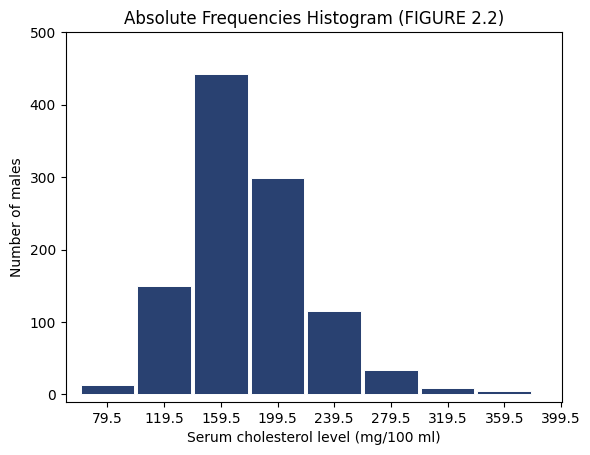

In [5]:
# Example 3: Create Histogram (FIGURE 2.2)

import matplotlib.pyplot as plt

# Assign x- and y-values
x = scDF.bounds
y = scDF.young

# Prepare for plotting
fig, ax = plt.subplots()

# Plot bar
ax.bar(x, y, width=38, edgecolor="white",
       color='#294171',
       linewidth=0.7)

# Add labels and title
ax.set_xlabel("Serum cholesterol level (mg/100 ml)")
ax.set_ylabel("Number of males")
ax.set_title("Absolute Frequencies Histogram (FIGURE 2.2)")

# Set tick marks and axes
ax.set_xticks(x)
ax.set(xlim=(50, 400),
       ylim=(-10.0, 500))


# Show plot
plt.show()

If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image6.png)


The above histogram is the Python recreation of the **FIGURE 2.2** on page 25 of your textbook. The figure legend in your textbook reads:
>Histogram: Absolute frequencies of serum cholesterol levels for 1067 United States males, aged 25 to 34 years


### **Exercise 3: Create Histogram**

For **Exercise 3**, you are to create a _Relative_ frequencies histogram of serum cholesterol for 1067 United States Males, aged 25 to 34 years. This is **FIGURE 2.3** in your textbook on page 26.

For the most part you can use exactly the same Python code that is shown in Example 2. Here are the code changes that you will need to make.

1. Assign the y-values to the column called `young_rel_freq` instead of `young`.
2. Change the Y axis label to read `Relative frequency of males (%)`.
3. Change the title to read `Relative Frequencies Histogram (FIGURE 2.3)`
4. Change the Y limits to `-1.0, 50`.

In [ ]:
# Insert your code for Exercise 3 here



If your code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image6a.png)


### Download Dataset

In the code in the cell below downloads a dataset called `pima.csv` from the course server `https://biologicslab.co/BIO5853/data/`. For this particular dataset, we do **not** want to set `index_col=0` so we have placed a pound sign **#** in front of the statement.

In [6]:
# Download dataset

import pandas as pd

# Read the datafile
pimaDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/pima.csv",
   # index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 10)

# Display DataFrame
display(pimaDF)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
...,...,...,...,...,...,...,...,...,...
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image7.png)


This dataset has 768 rows and 9 columns. Each row is contains one of nine clinical measurements for each subject in the dataset. Each row corresponds to one subject in the dataset. In other words, this dataset has clinical records for 768 women. These particular women are part of a famous study of genetic and environmental factors contributing to the development of Type II diabetes in native American women from the Pima Indian tribe.

## **Histograms Revisited**

The histograms of the serum cholesterol data created in Example 2 and **Exercise 2** were created using the Matplotlib `plt.bar()` function. The `plt.bar()` function was used since the serum cholesterol data had already been pre-processed and sorted into **_bins_**.

In a histogram, a _bin_ (or bucket) is an interval that groups a range of data points. Each bin represents the frequency of data points that fall within that range. For example, if you have a dataset of ages, you might create bins for age ranges like 0-10, 11-20, 21-30, and so on.

------------------------------------------------------------

**Importance of Bins in Histograms**

* **Data Distribution:** Bins help visualize the distribution of data, showing how data points are spread across different ranges. This can reveal patterns, such as skewness or the presence of outliers1.
* **Granularity:** The choice of bin width affects the granularity of the histogram. Too many bins can make the histogram cluttered and hard to interpret, while too few bins can oversimplify the data and hide important details2.
* **Comparison:** Bins allow for easy comparison of different data ranges. By examining the height of the bars in each bin, you can quickly see which ranges have more or fewer data points3.
* **Statistical Analysis:** Proper binning is crucial for accurate statistical analysis. It ensures that the histogram accurately represents the underlying data distribution without oversimplifying or complicating it

-------------------------------------------------------------

Normally, it will be up to you to divide the data into "bins" as part of creating your histogram. The first two arguments in Matplotlib's `plt.hist()` are (1) the data to plot and (2) the number of bins as illustrated in Example 3.

### Example 4: Create Histogram

The code in the cell below creates a histogram of showing the distribution of body mass indexes (BMIs) of the women in the Pima Indian dataset.

_Code Description:_

The code begins by assigning values to the two most important variables: (1) the data to be plotted (x) and (2) the number of bins:

~~~text
# Assign values
x=pimaDF.BMI
numBins=12
~~~

The dot notation is used to assign the x-values to just the data stored in the column called `BMI` is the DataFrame `pimaDF`. The number of bins is set to 12.

As an option, the code gives specific values to the x and y axis limits in the following code chunk:

~~~text
# Define x- and y- limits
plt.xlim(15, 60)
plt.ylim(0, 0.06)
plt.grid(False)
~~~

This is an _optional_ step. If you don't specify these limits, the `plt.hist()` function will decide for "itself" what these limits should be.

Next, we specify how to label the x- and y- axes and well as what title we want to show above the histogram using this code chunk:

~~~text
# Add labels and titles
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Histogram')
~~~

The last step is to show the plot.

~~~text
# Show plot
plt.show()
~~~

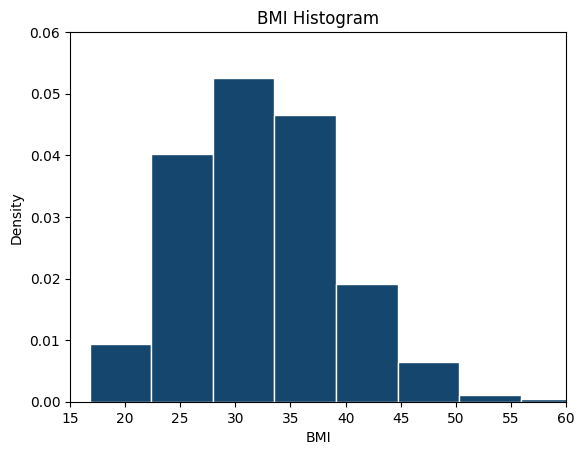

In [7]:
# Example 4: Create histogram

import matplotlib.pyplot as plt

# Assign values
x=pimaDF.BMI
numBins=12

# Plot histogram
n, bins, patches = plt.hist(x, numBins, density=True,
                            facecolor='#15466d',
                            edgecolor="white",
                            alpha=1.0)
# Define x- and y- limits
plt.xlim(15, 60)
plt.ylim(0, 0.06)
plt.grid(False)

# Add labels and titles
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Histogram')

# Show plot
plt.show()

If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image8.png)


### **Exercise 4: Create Histogram**

In the cell below, write the code to plot a histogram showing the distribution of blood glucose levels in the Pima Indian dataset. The blood glucose values are in `pimaDF` DataFrame in the column labeled `Glucose`. As in Example 3, set the number of bins to 12.

Do **not** specify the x- and y- limits--just let the function figure out good values for itself.

You will have to change the label for the x axis to `Glucose` and the title to `Bld Glucose Histogram`.

In [ ]:
# Insert your code for Exercise 4 here



If your code is correct, you should see the following freqency histogram of blood glucose levels:

![__](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image9.png)


## **Frequency Polygons**

A **_Frequency Polygon_** is a graphical tool used to understand the distribution of a dataset. It is similar to a histogram but uses a **_line graph_** to connect the midpoints of each bin or class interval.

**Key Features of Frequency Polygons**

* **Construction:** To create a frequency polygon, you plot points at the midpoints of each bin at heights corresponding to the frequencies of those bins. Then, you connect these points with straight lines1.
* **Comparison:** Frequency polygons are particularly useful for comparing multiple datasets on the same graph. This makes it easier to see differences and similarities between distributions2.
* **Cumulative Frequency:** They can also be used to display cumulative frequency distributions, which show the running total of frequencies up to each bin1.
* **Clarity:** Unlike histograms, frequency polygons can provide a clearer view of the overall shape and trends in the data, especially when comparing multiple datasets3.

### Example 5: Plot Histogram/Frequency Polygon

In Example 5, we recreate the frequency polygon shown in **FIGURE 2.4** on page 27 of your textbook.

_Code Description:_

To recreate this figure, we first generate a histogram of serum cholesterol levels using the same code as in Example 2. However, the fill color has been change to match the green hue.

~~~text
# Plot bar graph
ax.bar(x, y, width=38, edgecolor="white",
       color='#79a18d',
       linewidth=0.7)
~~~

The next set is to generate the open circle markers that are "on top" of each bin. This is done using Matplotlib's `ax.plot()` function as shown in this code chunk:

~~~text
# Plot markers
ax.plot(x, y, marker='o',
        markerfacecolor='w',
        markeredgecolor='k',
        markersize=8)
~~~

To get an open circle you set `marker='o'`. By setting the marker to different values, a large number of different marker shapes can be generated.

The Matplotlib `ax.plot()` function is also used to generate the black lines that connect the markers together using this code chunk:

~~~text
# Plot the lines
ax.plot(x, y, linestyle='-',
        color='k',
       linewidth=3.0)
~~~

As with markers, you can change the `linestyle` value to give several different types (e.g. dotted, dashed, dot-dash, etc.).

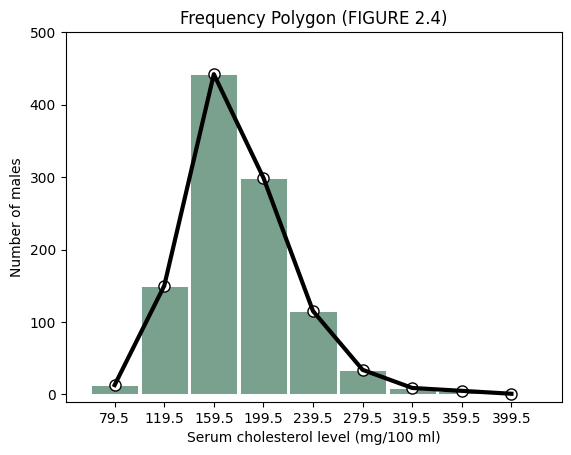

In [8]:
# Example 5: Frequency polygon (Figure 2.4)

import matplotlib.pyplot as plt

# Assign x- and y-values
x = scDF.bounds
y = scDF.young

# Prepare for plotting
fig, ax = plt.subplots()

# Plot bar graph
ax.bar(x, y, width=38, edgecolor="white",
       color='#79a18d',
       linewidth=0.7)

# Plot markers
ax.plot(x, y, marker='o',
        markerfacecolor='w',
        markeredgecolor='k',
        markersize=8)

# Plot lines
ax.plot(x, y, linestyle='-',
        color='k',
       linewidth=3.0)

# Add x and y axis labels
ax.set_xlabel("Serum cholesterol level (mg/100 ml)")
ax.set_ylabel("Number of males")

ax.set_title("Frequency Polygon (FIGURE 2.4)")
ax.set_xticks(x)

# Set the x and y limits
ax.set(xlim=(40, 440),
       ylim=(-10, 500))

# Show plot
plt.show()

If the code is correct, you should see the following frequency polygon superimposed on a histogram:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image10.png)


The figure legend in your textbook says:
>Frequency polygon: Absolute frequencies of serum cholesterol levels for 1067 United States males, aged 25 to 34 years.

### **Exercise 5: Plot Histogram/Frequency Polygon**

In the cell below, generate a combined histogram/frequency polygon using the code in Example 5. However, instead of plotting the absolute frequency, you should plot the relative frequency as was done in **Exercise 3**. In other words, you need to assign your x-values to column in `scDF` called `young_rel_freq` instead of `young`. You will also have to change the y label to read: `Relative frequencies of males (%)` and the title to read `Histogram/Frequency Polygon`.

Finally, set the x limits to `50` and `420` and the y limits to `-1.0` and `45`.

In [ ]:
# Insert your code for Exercise 5 here



If your code is correct, you should see the following plot:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image10a.png)


### Example 6: Plot Frequency Polygons

In Example 6, we recreate **FIGURE 2.5** in your textbook on page 28. In this graphic, two frequency polygons have been plotted together, one showing the serum cholesterol for males ages 25-34 (in blue) and other show serum cholesterol for ages 55-64 (in red). Co-plotting these two sets of data on the same axis makes it easy to visually compare these two pieces of data.

_Code Description:_

The code for Example 6 is essentially the same as that you should have written for **Exercise 5** except that now we have two different y-values, `y1` and `y2` as shown in the following code chunk:

~~~text
# Assign values
x = scDF.bounds
y1 = scDF.young_rel_freq
y2 = scDF.old_rel_freq
~~~

The code then plots the markers and lines, separately, for the data in `y1` and in `y2` using color values that match the hues of the figure in the textbook.

Since we are plotting two it is helful to have a **_legend_** printed as part of the figure. The code for adding a legend is in the following code chunk:

~~~text
# Add legend
ax.legend([line_y1, line_y2], ['Ages 25-34', 'Ages 55-64'],
          frameon=False)
~~~


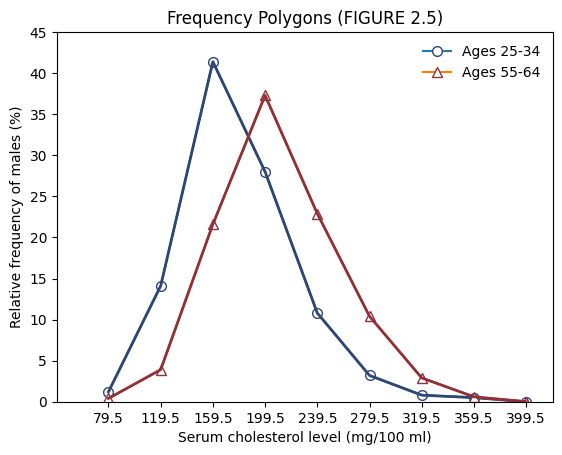

In [9]:
# Example 6: Plot frequency polygons (Figure 2.5)

import matplotlib.pyplot as plt

# Assign values
x = scDF.bounds
y1 = scDF.young_rel_freq
y2 = scDF.old_rel_freq

# Prepare for plotting
fig, ax = plt.subplots()

# Plot y1 markers
line_y1, = ax.plot(x, y1, marker='o',
        markerfacecolor='w',
        markeredgecolor='#2d4674',
        markersize=7,
        label='Ages 25-34')

# Plot y1 lines
line_y1, ax.plot(x, y1, linestyle='-',
        color='#2d4674',
        linewidth=2.0)

# Plot y2 markers
line_y2, = ax.plot(x, y2, marker='^',
        markerfacecolor='w',
        markeredgecolor='#8e3139',
        markersize=7,
        label='Ages 55-64')

# Plot y2 lines
line_y2, ax.plot(x, y2, linestyle='-',
        color='#8e3139',
        linewidth=2.0)

# Add labels and title
ax.set_xlabel("Serum cholesterol level (mg/100 ml)")
ax.set_ylabel("Relative frequency of males (%)")
ax.set_title("Frequency Polygons (FIGURE 2.5)")
ax.set_xticks(x)

# Set x, y limits
ax.set(xlim=(40, 420),
       ylim=(0, 45))

# Add legend
ax.legend([line_y1, line_y2], ['Ages 25-34', 'Ages 55-64'],
          frameon=False)

# Show plot
plt.show()

If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image11.png)


The figure legend in your textbook reads:
>Frequency polygon: Relative frequencies of serum cholesterol levels for 2294 United States males

### **Exercise 6: Plot Frequency Polygon**

For **Exercise 6** follow Example 6 to recreate **FIGURE 2.6** on page 28 of your textbook, showing **Cummulative** frequency polygons of the data displayed in Example 6. In general you can simply use the same code as shown in Example 6 with the code changes listed below.

Here is a list of code changes that you will need to make:

1. Assign `y1` to `scDF.young_cum_freq`
2. Assign `y2` to `scDF.old_cum_freq`
3. Set the y label to read `Cumulative Relative frequency of males (%)`
4. Set the title to read `Cumulative Frequency Polygons (FIGURE 2.6)`
5. Set `xlim=(40, 420)` and `ylim=(-5, 110)`
6. Add a black horizontal line at 50 using this code fragment: `ax.axhline(y=50, color='k')`
7. When creating the figure legend, add the following argument: `loc='lower right'`

In [ ]:
# Insert your code for Exericse 6 here



If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image12.png)


## **Box Plots**

A **_Boxplot_**, also known as a box-and-whisker plot, is a graphical representation used to display the distribution of a dataset. It provides a visual summary of several key statistics:

1. **Minimum:** The smallest data point, excluding outliers.
2. **First Quartile (Q1):** The median of the lower half of the dataset (25th percentile).
3. **Median (Q2):** The middle value of the dataset (50th percentile).
4. **Third Quartile (Q3):** The median of the upper half of the dataset (75th percentile).
5. **Maximum:** The largest data point, excluding outliers.

Here’s how it works:
* The **box** itself represents the interquartile range (IQR), which is the range between Q1 and Q3. This box contains the middle 50% of the data.
* The **line inside the box** indicates the median of the dataset.
* The **“whiskers”** extend from the box to the minimum and maximum values within 1.5 times the IQR from Q1 and Q3, respectively.
* **Outliers** are data points that fall outside the whiskers and are often plotted as individual points.
Boxplots are particularly useful for identifying outliers and understanding the spread and skewness of the data.

### Example 7: Download Dataset

For our next example, we will be using the `Crude Death Rates US` dataset. The next code cell downloads this dataset and creates a DataFrame called `drDF`.

As before, we use the `display(drDF)` function to print out a portion of our newly created DataFrame.

In [10]:
# Example 6: Download dataset

import pandas as pd

# Read the datafile
drDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/crude_death_rates_us.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 4)

# Display DataFrame
display(drDF)

,state,rate2016,rate2006,rate1996
1,Alabama,1078.800049,1021.5,1002.299988
2,Alaska,605.700012,500.6,425.399994
3,Arizona,817.299988,751.9,826.400024
4,Arkansas,1062.699951,992.6,1057.199951
5,California,668.099976,650.4,700.900024
...,...,...,...,...
47,Virginia,790.200012,754.8,801.500000
48,Washington,751.500000,721.1,763.700012
49,West Virginia,1241.400024,1136.8,1118.400024
50,Wisconsin,896.700012,830.6,874.900024


If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image13.png)


### **Exercise 7: Print Summary Statistics**

While the `display()` function is useful for printing out a portion of a DataFrame, the Pandas method `df.describe()` can be used to provide a quick look at the summary statistics of each column (category) in a DataFrame. In the cell below, use the following code chunk to print out the Summary Statistics for the `dfDF` DataFrame:

~~~text
# Print summary
drDF.describe()
~~~

In [ ]:
# Insert your code for Exercise 7 here



If the code is correct, you should see the following statistical summary:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image14.png)


### Example 8: Create Boxplot

The code in the cell below recreates the boxplot shown in **FIGURE 2.7** of crude US death rates for 2016, shown on page 29 in your textbook.

_Code Description:_

The following code chunk is used to create the plotting environment:

~~~text
# Create plot environment
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
~~~

The parameter `ax` is an **axes object**. When you create a plot, you often use `plt.subplots()` to generate a figure and one or more Axes objects.

Since we are creating a box plot for crude death rate for the year 2016, we assign `x` to appropiate column in the DataFrame using the following dot notation:

~~~text
# Assign x
x=drDF.rate2016
~~~

The next code chunk assigns values to various `flierprops` and `medianprops` parameters:

~~~text
# Assign properties
flierprops = dict(marker='o', markerfacecolor='black', markersize=6,
                  markeredgecolor='none')
medianprops = dict(linestyle='-', linewidth=1.0, color='black')
~~~

In Matplotlib’s pyplot, the `flierprops` and `medianprops` parameters are used to customize the appearance of the outliers (also known as “fliers”) and the median line in a boxplot. These properties can control various aspects of how the outliers and median line are displayed, such as their marker style, color, size, and more.

The code for generating the box plot is:

~~~text
# Plot box plot
bplot=ax.boxplot(x, notch=False,
           flierprops=flierprops,
           medianprops=medianprops,
           patch_artist=True,
           widths=0.6)
~~~

The remaining code adds the flier, title and fills the box with the selected color.

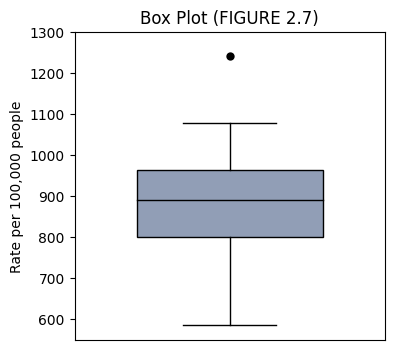

In [11]:
# Example 8: Create boxplot (Figure 2.7)

import matplotlib.pyplot as plt

# Create plot environment
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

# Assign x
x=drDF.rate2016

# Assign properties
flierprops = dict(marker='o', markerfacecolor='black', markersize=6,
                  markeredgecolor='none')
medianprops = dict(linestyle='-', linewidth=1.0, color='black')

# Plot box plot
bplot=ax.boxplot(x, notch=False,
           flierprops=flierprops,
           medianprops=medianprops,
           patch_artist=True,
           widths=0.6)

# Add flier
ax.flierprops = dict(marker='o', markerfacecolor='black', markersize=8,
                  linestyle='none')

ax.set_title('Box Plot (FIGURE 2.7)')

# Fill with color
fillColor =['#919eb6']
for patch, color in zip(bplot['boxes'], fillColor):
    patch.set_facecolor(color)

# Set axis
ax.set_xticks([])
ax.set(ylim=(550, 1300))
ax.set_xlabel('')
ax.set_ylabel('Rate per 100,000 people')

# Show plot
plt.show()

If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image15.png)


The figure legend in your textbook on page 29 for this box plot is:
>Box plot: Crude death rates for each state in the United States, 2016

As you can see there is only one outlier (dot). From the statistical summary the you created in **Exercise 6**, this value must be `1241.400024`, the maximum value for the year 2016. The median crude death rate is about 900 per 100,000 people.

### **Exercise 8: Create Boxplot**

The code in the cell below recreate the boxplot shown in **FIGURE 2.7** but show the crude US death rates for the year `1996` instead of `2016`.

Besides changing the column name for assigning the x values, the only other code changes that you should make is to set the y limits to `500` and `1300` and the title to `Box Plot (1996 Data)`.

In [ ]:
# Insert your code for Exercise 8 here



If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image15a.png)


As you can see there are 2 outliers in the data for the year `1996`. The median crude death rate is again about 900 per 100,000 people.

### Example 9: Create Box Plots

The code in the cell below shows how to recreate **FIGURE 2.8** on page 30 in your textbook. In this figure, box plots showing the crude US death rates for the years, `1996`, `2006` and `2016`, are arranged side-by-side.

To recreate this graph, we will need an additional Python plotting package called `Seaborn` which is imported with the alias `sns`.

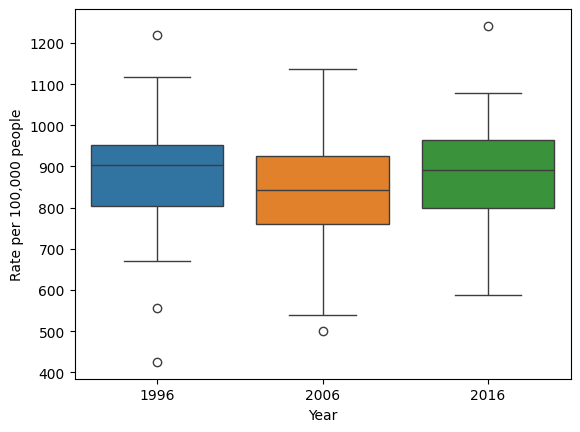

In [12]:
# Example 9: Create box plots (Figure 2.8)

import seaborn as sns
import matplotlib.pyplot as plt

# Drop column
df=drDF.drop(['state'], axis=1)

# Rearrange columns
cols=("rate1996", "rate2006", "rate2016")
df=df[["rate1996", "rate2006", "rate2016"]]

# Rename columns
df.rename(columns={"rate1996" : "1996", "rate2006" : "2006", "rate2016" : "2016"}, inplace=True)

# Plot boxplot
gfg=sns.boxplot(data=df)
gfg.set(xlabel="Year", ylabel="Rate per 100,000 people")

# Show plot
plt.show()

If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image16.png)


The figure legend for **FIGURE 2.8** shown on page 30 of your textbook reads as follows:
>Box plots: Crude death rates for each state in the United States, 1996, 2006, and 2016

In this instance no attempt was made to closely match the colors as they appear in your textbook.

## **Two-Way Scatter Plots**

A **_Two-Way Scatterplot_**, often simply called a scatterplot, is a type of graph used to display the relationship between two continuous variables. Each point on the scatterplot represents an observation in the dataset, with its position determined by the values of the two variables.

**Key Features of a Two-Way Scatterplot:**

* **X-axis:** Represents the values of one variable (often the independent variable).
* **Y-axis:** Represents the values of the other variable (often the dependent variable).
* **Data Points:** Each point on the plot corresponds to one observation, with its coordinates determined by the values of the two variables.
  
**Importance of Two-Way Scatterplots:**
* **Visualizing Relationships:** Scatterplots are excellent for visualizing the relationship between two variables. They can show whether there is a positive, negative, or no correlation between the variables.
* **Identifying Patterns:** They help in identifying patterns, trends, and clusters within the data. For example, a linear pattern might suggest a linear relationship, while a curved pattern might indicate a non-linear relationship.
* **Detecting Outliers:** Scatterplots make it easy to spot outliers, which are data points that deviate significantly from the overall pattern.
* **Assessing Strength and Direction:** The scatterplot can indicate the strength (how closely the points cluster around a line) and direction (positive or negative) of the relationship between the variables.
* **Model Evaluation:** In regression analysis, scatterplots can be used to visualize the fit of a regression model by overlaying a regression line on the plot.

### Download Dataset

The dataset used in the example below is called `fvc_fev.csv`. The code in the cell below downloads this dataset and assigns it to the new DataFrame `lcDF`. In pulmonary physiology, the abbreviation `fvc` stands for "forced vital capacity" while the abbreviation `fev` stands for "forced expiratory volume". Both of these are important measures of lung function.

These data came from a study investigating the physical effects of sulfur dioxide exposure. Forced vital capacity is the volume of air that can be expelled from the lungs in six seconds, and forced expiratory volume in one second is the volume that can be expelled after one second of constant effort.

In [13]:
# Download dataset

import pandas as pd

# Read the datafile
lcDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/fvc_fev.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 3)

# Display DataFrame
display(lcDF)

,subject_id,fev,fvc
1,1,4.7,5.8
2,2,4.3,5.1
3,3,3.5,4.1
...,...,...,...
17,17,3.0,3.8
18,18,4.5,5.8
19,19,2.4,4.1


If the code is correct, you should see the following output:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image17.png)


### Example 10: Create Two-Way Scatter Plot

The code in the cell below recreates **FIGURE 2.9** in page 31 in your textbook. This figure is a two-way scatter plot showing the relationship between Forced Vital Capacity (y axis) as a function of their Forced Expiratory Volume (x axis).

Each one circle represents these two values recorded from one of a total of 19 subjects. There are only 18 points marked on the graph instead of 19 because two individuals had identical values of fvc and fev; consequently, one point lies directly on top of another.

_Code Description:_

The code chunk that creates the xy scatter plot is as follows:

~~~text
# Plot xy scatter
ax.scatter(x, y, marker="o",
           s=60,
           c='white',
           edgecolors='k')
~~~


In [ ]:
# Example 10: Create scatter plot (Figure 2.9)

import matplotlib.pyplot as plt

# Assign x and y
x=lcDF.fev
y=lcDF.fvc

# Create plotting environment
fig, ax = plt.subplots()

# Plot xy scatter
ax.scatter(x, y, marker="o",
           s=60,
           c='white',
           edgecolors='k')

# Set limits and labels
ax.set(xlim=(0,6))
ax.set(ylim=(0,8))
ax.set_xlabel('Forced expiratory volume in one second (liter)')
ax.set_ylabel('Forced vital capacity (liters)')
ax.set_title('Two-Way Scatter Plot (Figure 2.9)')

# Show plot
plt.show()

If the code is correct, you should see the following scatter plot:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image18.png)


The figure legend for **FIGURE 2.9** in your textbook on page 31 is as follows:
>Two-way scatter plot: Forced vital capacity versus forced expiratory volume in one second for nineteen asthmatic subjects

By inspection you should be able to see that individuals with larger FEV values also have large FVC values.

## **Line Graphs**

A **_Line Graph_**, also known as a line chart, is a type of graph used to display data points connected by straight lines. It is particularly useful for showing trends over time or continuous data.

**Key Features of a Line Graph:**
1. **X-axis:** Represents the independent variable, often time.
2. **Y-axis:** Represents the dependent variable, which changes in response to the independent variable.
3. **Data Points:** Individual points plotted on the graph, each representing a pair of values.
4. **Lines:** Connect the data points to show the trend or pattern in the data.

**Importance of Line Graphs:**
* **Trend Visualization:** Line graphs are excellent for visualizing trends over time, such as renal output, number of diseased patients, or yearly population census data.
* **Comparison:** They allow for easy comparison of multiple datasets by plotting multiple lines on the same graph.
* **Clarity:** Line graphs provide a clear and straightforward way to represent data, making it easier to understand and interpret complex information.
* **Small Changes:** They are effective in highlighting small changes and fluctuations in the data that might be missed in other types of graphs.
* **Forecasting:** Line graphs can be used to predict future trends based on historical data.

### Download Dataset

The dataset for the next plot is called `malaria.csv`. The code below downloads this dataset and creates a new DataFrame called `mrDF`.

In [14]:
# Download dataset

import pandas as pd

# Read the datafile
mrDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/malaria.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 2)

# Display DataFrame
display(mrDF)

,year,rate
1,1940,59.209999
2,1941,51.139999
3,1942,44.860001
...,...,...
74,2013,0.510000
75,2014,0.540000
76,2015,0.430000


If the code is correct, you should see the following output:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image19.png)


### Compute Minimum and Maximum Values

By inspection of the output shown above, it is clear that there is a very large difference between the rate of malaria infections in `1940` (59.209999) and in `2015` (0.430000). As illustrated below, it is sometimes difficult to create a meaningful line plot if either the x- and/or the y-values have extreme values.

The code in the cell below calculates the minimum and maximum values for the malaria rates and by dividing the maximum rate by the minimum rate, the code computes the magnitude of the difference.

In [15]:
# Compute Min and Max rates

minRate=mrDF.rate.min()
maxRate=mrDF.rate.max()
magDif=maxRate/minRate

print(f"The maximum rate ({maxRate:.4f}) is {magDif:.0f} times larger than the minimum rate ({minRate:.4f})")

The maximum rate (59.2100) is 1480 times larger than the minimum rate (0.0400)


If your code is correct, you should see the following output:

~~~text
The maximum rate (59.2100) is 1480 times larger than the minimum rate (0.0400)
~~~

### Example 11: Create Line Graph

The code in the cell below recreates **FIGURE 2.10** in page 32 in your textbook. This figure is a line graph showing the reported rates of malaria in the US between the years 1940 and 2020.

_Code Description:_

The code chunk for generating the line graph is as follows:

~~~text
# Plot line graph semilog y scale
plt.plot(x,y,c='k')
plt.yscale('symlog')
~~~

In this particular plot, is a **_semilog_** plot. The data on the y-axis are expressed as their logarithms instead of the normal value. This essentially _compresses_ their values. For example, instead of 100, the plotted value = 2, instead of 1000, the plotted value = 3, and so on.

Semilog plots are important because they allow us to visualize and analyze data that spans several orders of magnitude, making it easier to interpret and understand relationships in the data.

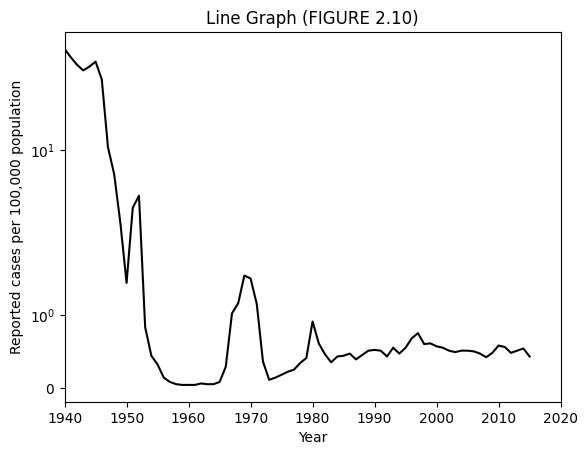

In [16]:
# Example 11: Create line graph (Figure 2.10)

import matplotlib.pyplot as plt

# Assign x and y
x=mrDF.year
y=mrDF.rate

# Create plotting environment
fig, ax = plt.subplots()

# Plot line graph semilog y scale
plt.plot(x,y,c='k')
plt.yscale('symlog')

# Set properties
ax.set(xlim=(1940,2020))
ax.set_xlabel('Year')
ax.set_ylabel('Reported cases per 100,000 population')
ax.set_title("Line Graph (FIGURE 2.10)")

# Show plot
plt.show()

If the code is correct, you should see the following line plot:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image20.png)


The figure legend for **FIGURE 2.10** in your textbook on page 32 reads as follows:
>Line graph: Reported rates of malaria by year, United States, 1940–2015

As you can see, the overall historical trend is the marked reduction in the incidence of malaria in the US. Keep in mind that this is a **_semilog_** plot which means the actual reduction is much greater than it might appear. In a previous cell be made the following calculations:

~~~text
The maximum rate (59.2100) is 1480 times larger than the minimum rate (0.0400)
~~~

So the reduction is more than 1000X!

You should also note that after `1960`, the rate of malarial infections increased with a large peak occurring in `1970` and to lesser extent, in `1980`. Keep this in mind while you complete **Exercise 11** below.

### **Exercise 11: Create Line Graph**

For **Exercise 11**, you are recreate **FIGURE 2.10** but _without_ using a semilog scale. To do this, simply copy the code in Example 11, but comment out the following line of code as shown here:

~~~text
# Plot line graph semilog y scale
plt.plot(x,y,c='k')
#plt.yscale('symlog')
~~~

By commenting out the `plt.yscale('symlog')`, the `plt.plot()` function creates a line plot with "normal" axes.

In [ ]:
# Insert your code for Exercise 11 here



If the code is correct, you should see the following line plot:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image20a.png)


From visual inspection you should be able to appreciate the difference a "normal" line graph (shown immediately above) and a semilog line graph (shown in Example 11). When the magnitude of the difference between the largest and smallest values is very large, using a semilog plot allows you see changes that are obscured when plotting on "normal" axes.

### Download Dataset

The data for **FIGURE 2.11** is stored in a file called `healthcare_us_canada.csv`. The code in the cell below, reads this datafile and creates a new DataFrame called `hcDF`.

In [17]:
# Download dataset

import pandas as pd

# Read datafile
hcDF = pd.read_csv(
    "https://biologicslab.co/BIO5853/data/healthcare_us_canada.csv",
    index_col=0,
    na_values=['NA','?'])

# Set max rows and max columns
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 3)

# Display DataFrame
display(hcDF)

,year,canada,usa
1,1970,7.1,7.400000
2,1975,7.2,7.900000
3,1976,7.0,8.100000
...,...,...,...
42,2015,11.4,17.700001
43,2016,11.5,17.900000
44,2017,11.5,18.000000


If the code is correct, you should see the following output:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image21.png)


### Example 12: Plot 2 Line Graphs

The last example in this lesson shows how to recreate **FIGURE 2.11** shown on page 32 of your textbook. To compare two or more groups with respect to a given quantity, it is possible to plot more than one measurement along the vertical axis. Suppose we are concerned with the rising costs of health  care. To investigate this problem, we might wish to compare the variations in cost that have occurred under two different health care systems in recent years.

_Code Description:_

Besides plotting two lines in different, the code is very similar to that shown in Example 10.

One difference is the addition of text inside the plot using the following code chunk:

~~~text
# Add text
text_x1=1988
text_y1=14
plt.text(text_x1, text_y1, 'United States', fontsize=12)

text_x2=2004
text_y2=9.3
plt.text(text_x2, text_y2, 'Canada', fontsize=12)
~~~

The function `plt.text()` takes 4 arguments:
1. the starting x-coordinate
2. the starting y-coordinate
3. the text to be printed
4. the font size

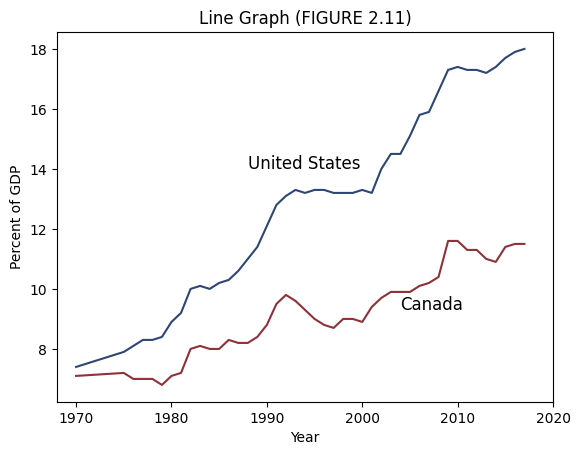

In [18]:
# Example 12: Plot 2 line graphs (Figure 2.11)

import matplotlib.pyplot as plt

# Assign x and y
x=hcDF.year
y1=hcDF.usa
y2=hcDF.canada

# Create plot environment
fig, ax = plt.subplots()

# Plot line graphs
plt.plot(x,y1,c='#2d4674')  # color dark blue
plt.plot(x,y2,c='#8e3139')  # color dark red

# Add text
text_x1=1988
text_y1=14
plt.text(text_x1, text_y1, 'United States', fontsize=12)

text_x2=2004
text_y2=9.3
plt.text(text_x2, text_y2, 'Canada', fontsize=12)

# Set properties
ax.set(xlim=(1968,2020))
ax.set_xlabel('Year')
ax.set_ylabel('Percent of GDP')
ax.set_title("Line Graph (FIGURE 2.11)")

# Show plot
plt.show()

If the code is correct, you should see the following bar chart:

![_](https://biologicslab.co/BIO5853/images/module_01/lesson_01_4_image22.png)


The figure legend for **FIGURE 2.11** on page 32 of your textbook is as follows:
>Line graph: Health care expenditures as a percentage of gross domestic product (gdp) for the United States and Canada, 1970-2017.

Clearly the health care costs in the US have increased more rapidly than in Canada in the period shown in this graph.

## **Lesson Turn-in**

When you have run all of the code cells print out a PDF copy of your COLAB notebook. You should name your PDF  `Lesson_01_4_lastname.pdf` where _lastname_ is your last name. Upload the PDF to Lesson_01_4 on Canvas for grading.